In [37]:
%%configure -f
{
    "conf": {
        "spark.pyspark.python": "python3",
        "spark.pyspark.virtualenv.enabled": "true",
        "spark.pyspark.virtualenv.type":"native",
        "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
    }
}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1683311414709_0006,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1683311414709_0006,pyspark,idle,Link,Link,✔


In [38]:
# install the necessary packages
sc.install_pypi_package("boto3==1.19.2")
sc.install_pypi_package("pandas==1.0.5")
sc.install_pypi_package("scipy==1.4.1")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.11.0")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/59/60/163503f24cf09553d0bb6c37db9ff3254f6cda812cab00430602867d03f5/boto3-1.19.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6a/73/552b27e3a1b4f83630907c4958be78e9d4c906e73efd554ebd5e21cb1692/botocore-1.22.12-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7b/9c/f51775ebe7df5a7aa4e7c79ed671bde94e154bd968aca8d65bb24aba0c8c/s3transfer-0.5.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7b/f5/890a0baca17a61c1f92f72b81d3c31523c99bec609e60c292ea55b387ae8/urllib3-1.26.15-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/af/f3/683bf2547a3eaeec15b39cef86f61e921b3b187f250fcd2b5c5fb4386369/pandas-1.0.5-cp37-cp37m-manylinux1_x86_64.whl

  Using cached https://files.pythonhosted.

In [41]:
# import packages/functions
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
df = spark.read.parquet('s3://nyc-tlc/trip data/yellow_tripdata_2019*.parquet')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[VendorID: bigint, tpep_pickup_datetime: timestamp, tpep_dropoff_datetime: timestamp, passenger_count: double, trip_distance: double, RatecodeID: double, store_and_fwd_flag: string, PULocationID: bigint, DOLocationID: bigint, payment_type: bigint, fare_amount: double, extra: double, mta_tax: double, tip_amount: double, tolls_amount: double, improvement_surcharge: double, total_amount: double, congestion_surcharge: double, airport_fee: int]

In [18]:
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: integer (nullable = true)

In [19]:
df.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

84598444

In [11]:
df.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       1| 2019-03-01 00:24:41|  2019-03-01 00:25:31|            1.0|          0.0|       1.0|                 N|         145|         145|           2|        2.5|  0.5|    0.5|       0.

In [ ]:
# Analyze the distribution of ride duration

In [42]:
# filter out null values from pickup and dropoff time columns
df = df.filter(F.col('tpep_pickup_datetime').isNotNull() & F.col('tpep_dropoff_datetime').isNotNull())

# calculate ride duration in seconds
df = df.withColumn('ride_duration', (F.unix_timestamp('tpep_dropoff_datetime') - F.unix_timestamp('tpep_pickup_datetime')).cast('int'))

# show distribution of ride durations
df.select('ride_duration').describe().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|     ride_duration|
+-------+------------------+
|  count|          84598444|
|   mean|1084.0334850012134|
| stddev|  6025.28052642268|
|    min|         -31527629|
|    max|           2618881|
+-------+------------------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

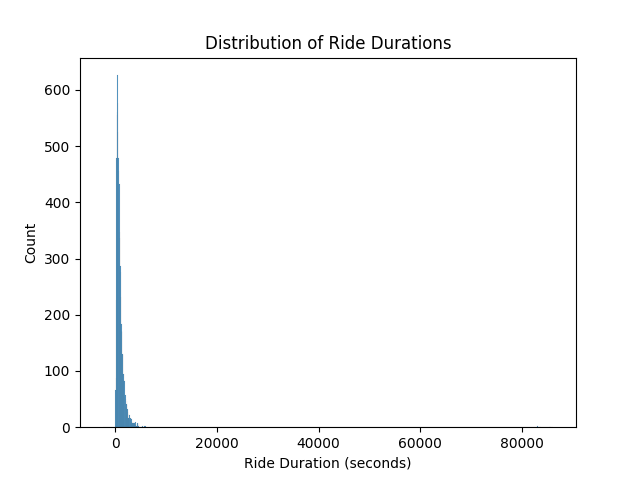

In [44]:
# Sample 0.01% of the data
sampled_df = df.sample(fraction=0.0001, seed=42)

# Extract ride duration data as a list
ride_duration_list = sampled_df.select('ride_duration').rdd.flatMap(lambda x: x).collect()

plt.close()

# Plot a histogram of ride durations
sns.histplot(ride_duration_list, kde=False)
plt.title('Distribution of Ride Durations')
plt.xlabel('Ride Duration (seconds)')
plt.ylabel('Count')
plt.show()

%matplot plt

In [ ]:
# The distribution plot of ride_duration gives a clear picture of how long most rides took, providing insights into the behavior of the taxi service customers and drivers. The histogram clearly shows that the distribution is right-skewed.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

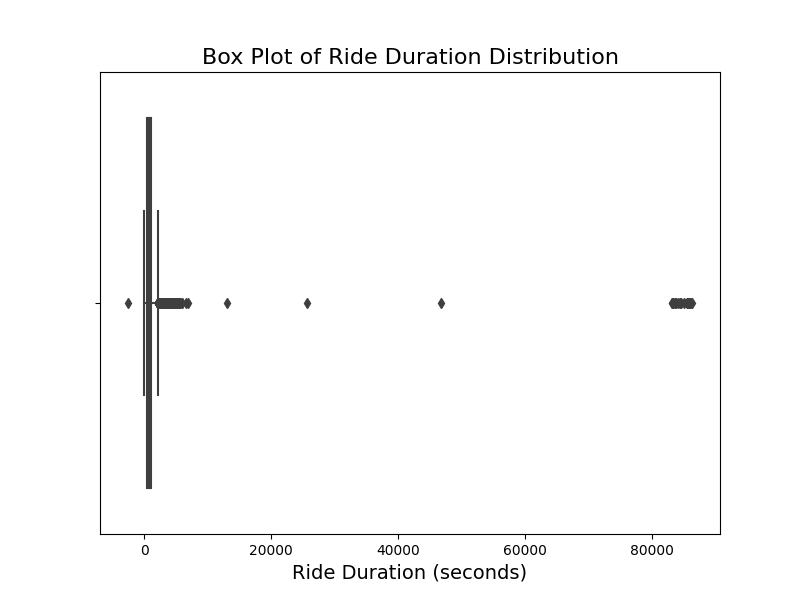

In [45]:
plt.close()

# Plot a boxplot of ride durations
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=ride_duration_list, ax=ax)
ax.set_xlabel('Ride Duration (seconds)', fontsize=14)
ax.set_title('Box Plot of Ride Duration Distribution', fontsize=16)
plt.show()

%matplot plt

In [ ]:
# The boxplot is helpful to identify the outliers of the distribution of ride duration. It's also clear that there are negative values for ride duration, which do not make sense. Therefore, I removed these negative data points in the next step.

In [46]:
# inspect the rows with negative values for 'ride_duration' 
df.filter(F.col('ride_duration') <= 0).count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

78951

In [50]:
# filter out rows with negative ride_duration
df = df.filter(F.col('ride_duration') > 0)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

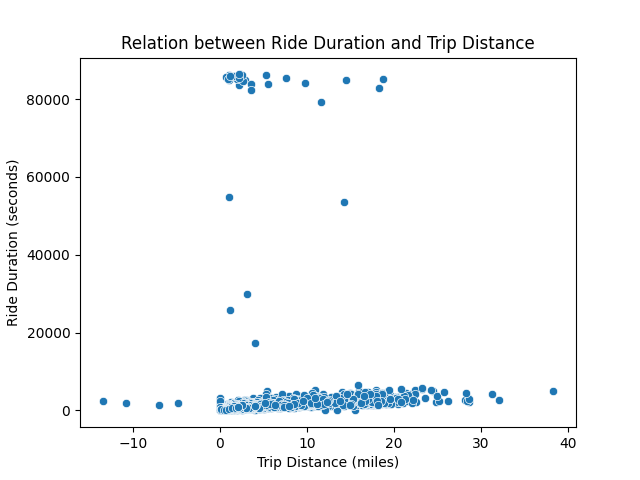

In [53]:
# Explore the relations between ride_duration and trip_distance
# extract a random sample of the dataframe
sample_df = df.select('ride_duration', 'trip_distance').sample(False, 0.0001, seed=42)

# convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = sample_df.toPandas()

plt.close()
# create the scatter plot using seaborn
ax = sns.scatterplot(data=pandas_df, x='trip_distance', y='ride_duration')
ax.set_title('Relation between Ride Duration and Trip Distance')
ax.set_ylabel('Ride Duration (seconds)')
ax.set_xlabel('Trip Distance (miles)')
# show the plot
plt.show()

%matplot plt

In [54]:
# This scatter plot clearly shows that there are outliers in two ways. First, trip distance shouldn't be negative. Second, ride duration shouldn't be riculously high while distance is not that large. Therefore, I try to clean up these outliers.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
# filter out rows with negative trip_distance
df = df.filter(F.col('trip_distance') > 0)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [56]:
# filter out rows with ride_duration longer than 17000 
# based on boxplot as well as the scatter plot above
df = df.filter(F.col('ride_duration') < 17000)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

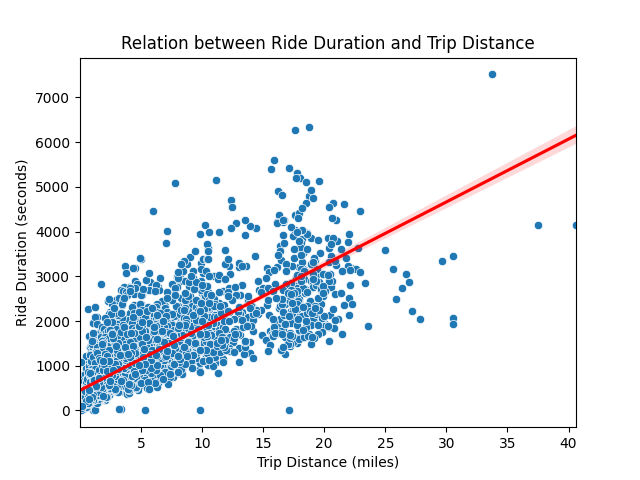

In [58]:
# Plot the relations again after cleaning up outliers
# extract a random sample of the dataframe
sample_df = df.select('ride_duration', 'trip_distance').sample(False, 0.0001, seed=42)

# convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = sample_df.toPandas()

plt.close()
# Explore the relations between ride_duration and trip_distance
# extract a random sample of the dataframe
sample_df = df.select('ride_duration', 'trip_distance').sample(False, 0.0001, seed=42)

# convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = sample_df.toPandas()

plt.close()
# create the scatter plot using seaborn
ax = sns.scatterplot(data=pandas_df, x='trip_distance', y='ride_duration')
sns.regplot(data=pandas_df, x='trip_distance', y='ride_duration', scatter=False, color='red')
ax.set_title('Relation between Ride Duration and Trip Distance')
ax.set_ylabel('Ride Duration (seconds)')
ax.set_xlabel('Trip Distance (miles)')
# show the plot
plt.show()

%matplot plt

In [59]:
# This scatter plot with a regression line shows a positive correlation between trip distance and ride duration, which makes sense in real life. It also illustrates that the duration and distance are both more centralized at the lower end.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

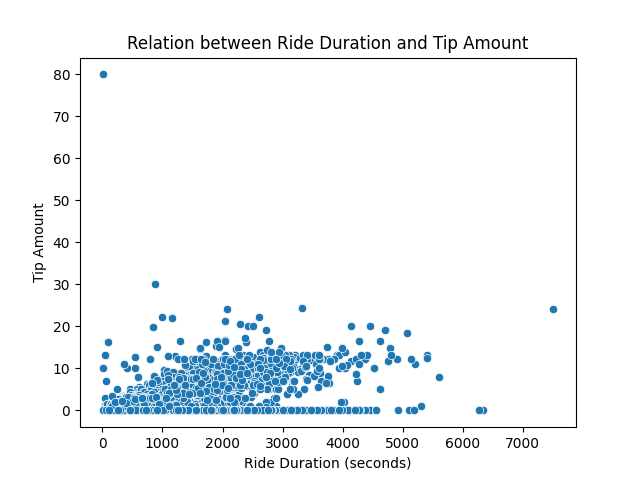

In [60]:
# Explore the relations between tip_amount and ride_duration 
# extract a random sample of the dataframe
sample_df = df.select('tip_amount', 'ride_duration').sample(False, 0.0001, seed=42)

# convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = sample_df.toPandas()

plt.close()
# create the scatter plot using seaborn
ax = sns.scatterplot(data=pandas_df, x='ride_duration', y='tip_amount')
ax.set_title('Relation between Ride Duration and Tip Amount')
ax.set_xlabel('Ride Duration (seconds)')
ax.set_ylabel('Tip Amount')
# show the plot
plt.show()

%matplot plt

In [61]:
# This scatter plot shows that some outliers for tip amount are skewing the plot. Therefore I'll clean out these ridiculously large amount first, and then plot a regression line.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [63]:
# filter out rows with tip_amount larger than 40 and smaller than 0
df = df.filter((F.col('tip_amount') >= 0) & (F.col('tip_amount') < 40))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

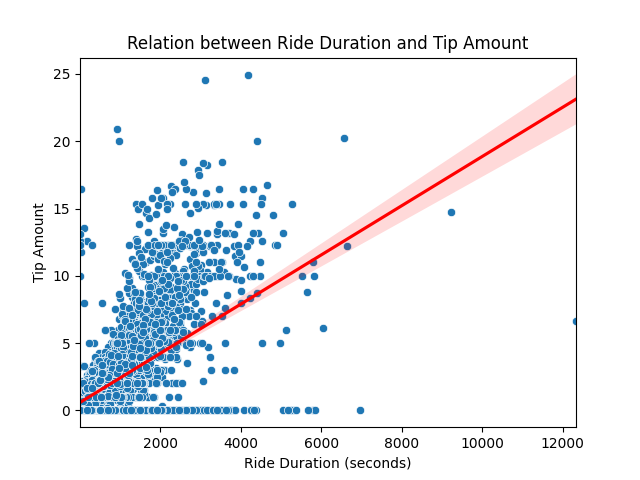

In [64]:
# Plot the relations again after cleaning up outliers
sample_df = df.select('tip_amount', 'ride_duration').sample(False, 0.0001, seed=42)

# convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = sample_df.toPandas()

plt.close()
# create the scatter plot using seaborn
ax = sns.scatterplot(data=pandas_df, x='ride_duration', y='tip_amount')
sns.regplot(data=pandas_df, x='ride_duration', y='tip_amount', scatter=False, color='red')
ax.set_title('Relation between Ride Duration and Tip Amount')
ax.set_xlabel('Ride Duration (seconds)')
ax.set_ylabel('Tip Amount')
# show the plot
plt.show()

%matplot plt

In [65]:
# This scatter plot with a regression line shows a potential positive correlation between ride duration and tip amount. The longer the taxi ride, the more customers tend to tip.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

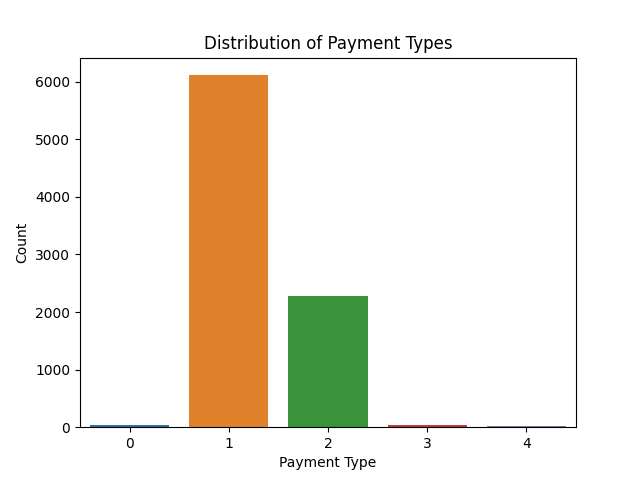

In [66]:
# Plot the distribution of payment type
# extract a random sample of the dataframe
sample_df = df.select('payment_type').sample(False, 0.0001, seed=42)

# convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = sample_df.toPandas()

plt.close()
# create the bar plot using seaborn
ax = sns.countplot(data=pandas_df, x='payment_type')
ax.set_title('Distribution of Payment Types')
ax.set_ylabel('Count')
ax.set_xlabel('Payment Type')

# show the plot
plt.show()

%matplot plt

In [67]:
# From the bar plot, we can tell that payment type 1 and 2 take up the absolote majority of the payment types. Payment type 1 is by far the most popular one. I want to see if this patterns persists for rides with no tips.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [71]:
# count the rides with 0 tips
df.filter(F.col('tip_amount') == 0).count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

25743101

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

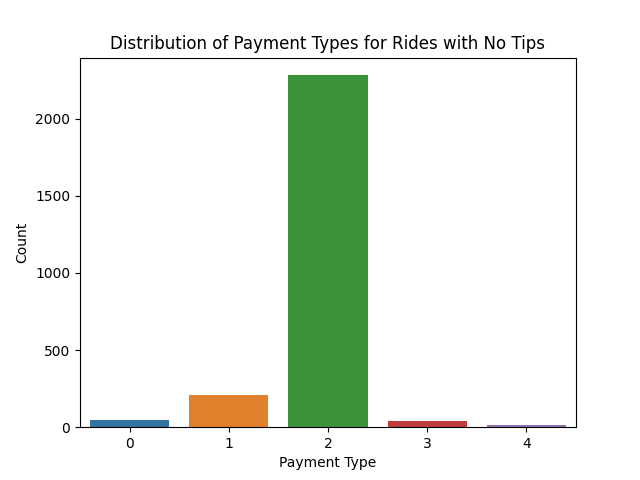

In [74]:
# filter out rows with tip_amount equals zero
df_filtered = df.filter(F.col('tip_amount') == 0).sample(False, 0.0001, seed=42)

# group the dataframe by payment_type and count the number of occurrences of VendorID
payment_counts = df_filtered.groupBy('payment_type').agg(F.count('VendorID').alias('count'))

# convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = payment_counts.toPandas()

plt.close()
# create the bar plot using seaborn
ax = sns.barplot(data=pandas_df, x='payment_type', y='count')
ax.set_title('Distribution of Payment Types for Rides with No Tips')
ax.set_ylabel('Count')
ax.set_xlabel('Payment Type')

# show the plot
plt.show()

%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

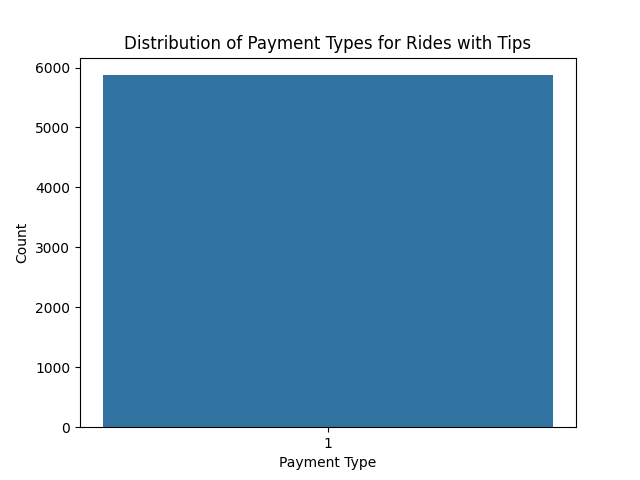

In [75]:
# filter out rows with tip_amount equals zero
df_filtered = df.filter(F.col('tip_amount') != 0).sample(False, 0.0001, seed=42)

# group the dataframe by payment_type and count the number of occurrences of VendorID
payment_counts = df_filtered.groupBy('payment_type').agg(F.count('VendorID').alias('count'))

# convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = payment_counts.toPandas()

plt.close()
# create the bar plot using seaborn
ax = sns.barplot(data=pandas_df, x='payment_type', y='count')
ax.set_title('Distribution of Payment Types for Rides with Tips')
ax.set_ylabel('Count')
ax.set_xlabel('Payment Type')

# show the plot
plt.show()

%matplot plt

In [77]:
# display the results
payment_counts.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+-----+
|payment_type|count|
+------------+-----+
|           1| 5872|
+------------+-----+

In [ ]:
# There is an interesting contrast between distribution of payment types with tips and no tips. For no tip rides, the most used payment types is type 2; while for rides with tips, only payment type 1 is used.